In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud Dataset/creditcard.csv")

# Data Exploration
print(df.info())
print(df.head())

# Check class distribution
class_counts = df["Class"].value_counts()
print("Class Distribution:\n", class_counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<ipython-input-29-16e4ebb85269>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["green", "red"])


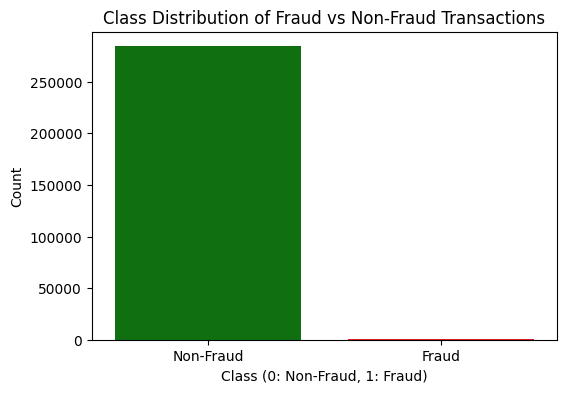

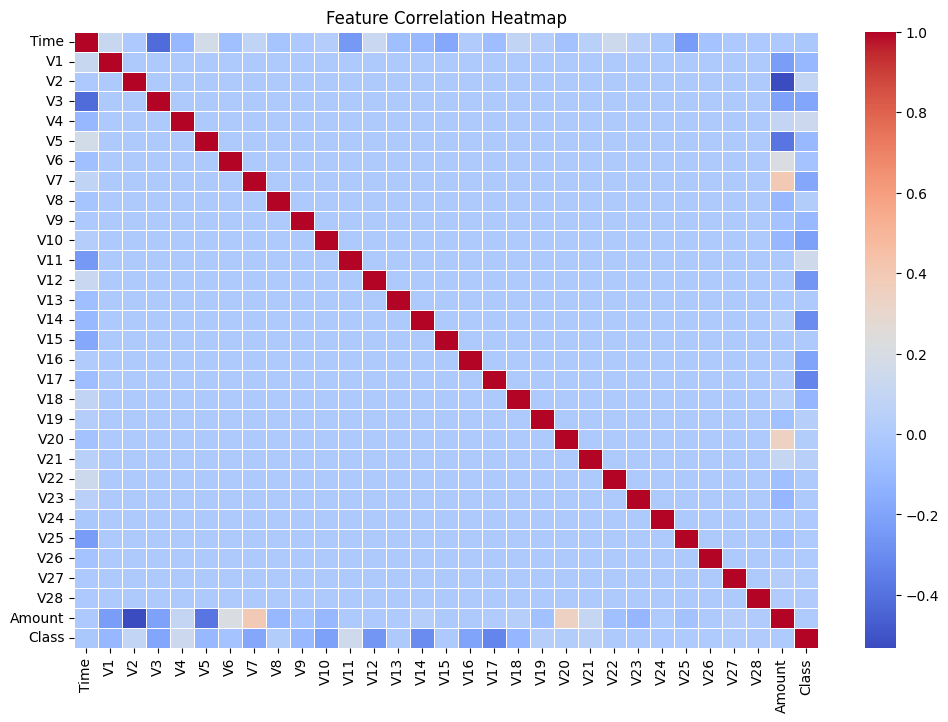

In [29]:
# Visualization of Class Imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["green", "red"])
plt.title("Class Distribution of Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
# Data Preprocessing
X = df.drop(columns=["Class"])
y = df["Class"]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handle Imbalanced Data with SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


Training Logistic Regression...

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
 [[55399  1465]
 [    8    90]]
ROC-AUC Score: 0.970987885165321
Training Random Forest...

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56852    12]
 [   17    81]]
ROC-AUC Score: 0.9782405998415122
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:55:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56826    38]
 [   14    84]]
ROC-AUC Score: 0.9831264068655036


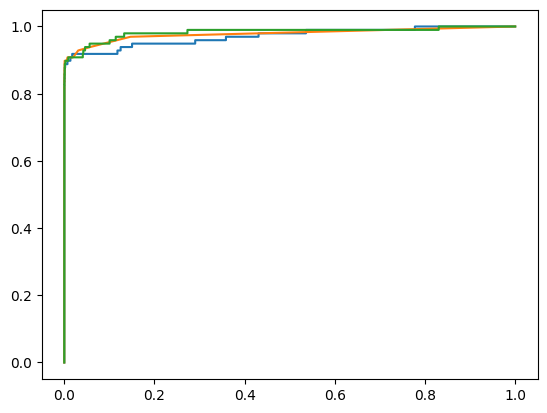

In [31]:
# Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluation
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")



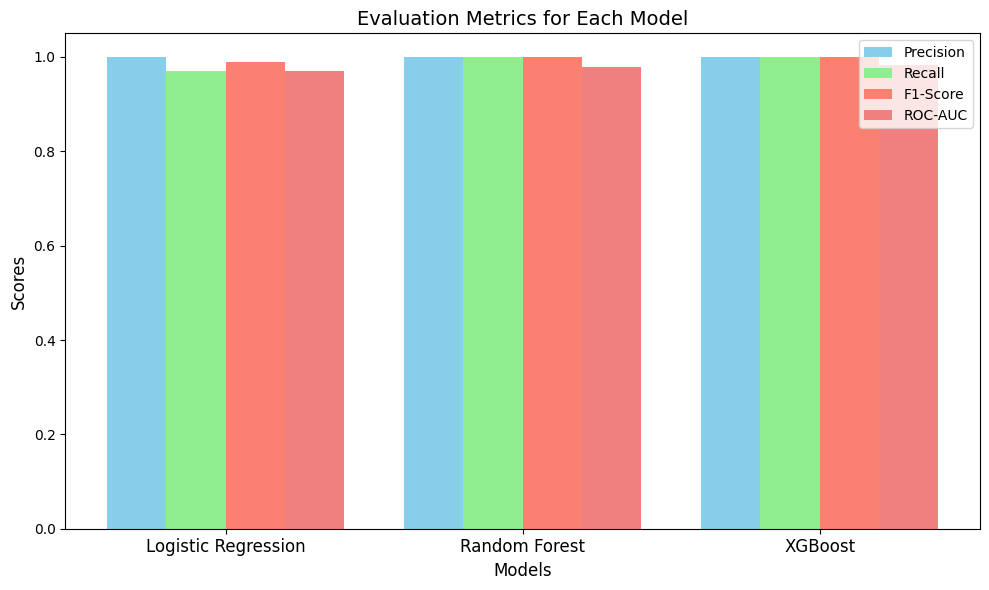

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for all models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
precision = [1.00, 1.00, 1.00]  # Precision for each model
recall = [0.97, 1.00, 1.00]     # Recall for each model
f1_score = [0.99, 1.00, 1.00]   # F1-Score for each model
roc_auc = [0.970987885165321, 0.9782405998415122, 0.9831264068655036]  # ROC-AUC for each model

# Bar positions for each metric
bar_width = 0.2
index = np.arange(len(models))

# Creating subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each metric as a bar
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='skyblue')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='lightgreen')
bar3 = ax.bar(index + 2*bar_width, f1_score, bar_width, label='F1-Score', color='salmon')
bar4 = ax.bar(index + 3*bar_width, roc_auc, bar_width, label='ROC-AUC', color='lightcoral')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Evaluation Metrics for Each Model', fontsize=14)
ax.set_xticks(index + 1.5 * bar_width)  # Positioning the x-ticks
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
